In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fim import apriori

In [2]:
Xtrain=pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\università\Magistrale\Primo Anno\Primo Semestre\Data Mining\TRAIN_DF_2.csv")
Xtrain=Xtrain.drop(columns=['Unnamed: 0'])
Xtrain.head()

,duration_ms,popularity,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,-0.020154,0.46,0.690,-0.611468,0.0975,0.302000,0.53600,0.281,0.6350,0.600520,13
1,1.956926,0.00,0.069,-2.664368,0.0805,0.283000,0.93400,0.360,0.0336,-1.582457,12
2,0.876747,0.03,0.363,0.238999,0.0397,0.000089,0.80000,0.262,0.4890,-0.238038,1
3,0.253963,0.23,0.523,0.546466,0.0765,0.066400,0.00127,0.117,0.3850,0.556582,2
4,0.623991,0.25,0.643,-0.412569,0.0539,0.000576,0.09690,0.299,0.6370,0.657367,8


In [3]:
Xtrain["duration_ms_Bin"] = pd.qcut(Xtrain["duration_ms"], 3, duplicates='drop')
Xtrain["popularity_Bin"] = pd.qcut(Xtrain["popularity"], 3, duplicates='drop')
Xtrain["danceability_Bin"] = pd.qcut(Xtrain["danceability"], 3, duplicates='drop')
Xtrain["loudness_Bin"] = pd.qcut(Xtrain["loudness"], 3, duplicates='drop')
Xtrain["speechiness_Bin"] = pd.qcut(Xtrain["speechiness"], 3, duplicates='drop')
Xtrain["acousticness_Bin"] = pd.qcut(Xtrain["acousticness"], 3, duplicates='drop')
Xtrain["instrumentalness_Bin"] = pd.qcut(Xtrain["instrumentalness"], 3, duplicates='drop')
Xtrain["liveness_Bin"] = pd.qcut(Xtrain["liveness"], 3, duplicates='drop')
Xtrain["valence_Bin"] = pd.qcut(Xtrain["valence"], 3, duplicates='drop')
Xtrain["tempo_Bin"] = pd.qcut(Xtrain["tempo"], 3, duplicates='drop') 

Xtrain.drop(["duration_ms", "popularity", "danceability", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"], axis=1, inplace=True)
Xtrain.head()

,genre,duration_ms_Bin,popularity_Bin,danceability_Bin,loudness_Bin,speechiness_Bin,acousticness_Bin,instrumentalness_Bin,liveness_Bin,valence_Bin,tempo_Bin
0,13,"(-0.465, 0.206]","(0.35, 0.94]","(0.657, 0.98]","(-6.8020000000000005, -0.054]","(0.0698, 0.939]","(0.0316, 0.414]","(0.374, 1.0]","(0.209, 0.994]","(0.579, 0.995]","(0.364, 3.166]"
1,12,"(0.206, 7.23]","(-0.001, 0.18]","(-0.001, 0.497]","(-6.8020000000000005, -0.054]","(0.0698, 0.939]","(0.0316, 0.414]","(0.374, 1.0]","(0.209, 0.994]","(-0.001, 0.27]","(-3.0669999999999997, -0.456]"
2,1,"(0.206, 7.23]","(-0.001, 0.18]","(-0.001, 0.497]","(-0.054, 0.516]","(-0.001, 0.0411]","(-0.001, 0.0316]","(0.374, 1.0]","(0.209, 0.994]","(0.27, 0.579]","(-0.456, 0.364]"
3,2,"(0.206, 7.23]","(0.18, 0.35]","(0.497, 0.657]","(0.516, 2.012]","(0.0698, 0.939]","(0.0316, 0.414]","(1.25e-05, 0.374]","(0.107, 0.209]","(0.27, 0.579]","(0.364, 3.166]"
4,8,"(0.206, 7.23]","(0.18, 0.35]","(0.497, 0.657]","(-6.8020000000000005, -0.054]","(0.0411, 0.0698]","(-0.001, 0.0316]","(1.25e-05, 0.374]","(0.209, 0.994]","(0.579, 0.995]","(0.364, 3.166]"


In [4]:
Xtrain["duration_ms_Bin"] = Xtrain["duration_ms_Bin"].astype(str) + "_Dur_ms"
Xtrain["popularity_Bin"] = Xtrain["popularity_Bin"].astype(str) + "_pop"
Xtrain["danceability_Bin"] = Xtrain["danceability_Bin"].astype(str) + "_danc"
Xtrain["loudness_Bin"] = Xtrain["loudness_Bin"].astype(str) + "_loud"
Xtrain["speechiness_Bin"] = Xtrain["speechiness_Bin"].astype(str) + "_speech"
Xtrain["acousticness_Bin"] = Xtrain["acousticness_Bin"].astype(str) + "_acoust"
Xtrain["instrumentalness_Bin"] = Xtrain["instrumentalness_Bin"].astype(str) + "_instr"
Xtrain["liveness_Bin"] = Xtrain["liveness_Bin"].astype(str) + "_liv"
Xtrain["valence_Bin"] = Xtrain["valence_Bin"].astype(str) + "_val"
Xtrain["tempo_Bin"] = Xtrain["tempo_Bin"].astype(str) + "_tempo"
Xtrain.head()


,genre,duration_ms_Bin,popularity_Bin,danceability_Bin,loudness_Bin,speechiness_Bin,acousticness_Bin,instrumentalness_Bin,liveness_Bin,valence_Bin,tempo_Bin
0,13,"(-0.465, 0.206]_Dur_ms","(0.35, 0.94]_pop","(0.657, 0.98]_danc","(-6.8020000000000005, -0.054]_loud","(0.0698, 0.939]_speech","(0.0316, 0.414]_acoust","(0.374, 1.0]_instr","(0.209, 0.994]_liv","(0.579, 0.995]_val","(0.364, 3.166]_tempo"
1,12,"(0.206, 7.23]_Dur_ms","(-0.001, 0.18]_pop","(-0.001, 0.497]_danc","(-6.8020000000000005, -0.054]_loud","(0.0698, 0.939]_speech","(0.0316, 0.414]_acoust","(0.374, 1.0]_instr","(0.209, 0.994]_liv","(-0.001, 0.27]_val","(-3.0669999999999997, -0.456]_tempo"
2,1,"(0.206, 7.23]_Dur_ms","(-0.001, 0.18]_pop","(-0.001, 0.497]_danc","(-0.054, 0.516]_loud","(-0.001, 0.0411]_speech","(-0.001, 0.0316]_acoust","(0.374, 1.0]_instr","(0.209, 0.994]_liv","(0.27, 0.579]_val","(-0.456, 0.364]_tempo"
3,2,"(0.206, 7.23]_Dur_ms","(0.18, 0.35]_pop","(0.497, 0.657]_danc","(0.516, 2.012]_loud","(0.0698, 0.939]_speech","(0.0316, 0.414]_acoust","(1.25e-05, 0.374]_instr","(0.107, 0.209]_liv","(0.27, 0.579]_val","(0.364, 3.166]_tempo"
4,8,"(0.206, 7.23]_Dur_ms","(0.18, 0.35]_pop","(0.497, 0.657]_danc","(-6.8020000000000005, -0.054]_loud","(0.0411, 0.0698]_speech","(-0.001, 0.0316]_acoust","(1.25e-05, 0.374]_instr","(0.209, 0.994]_liv","(0.579, 0.995]_val","(0.364, 3.166]_tempo"


In [5]:
X = Xtrain.values.tolist()

In [6]:
X[0]

[13,
 '(-0.465, 0.206]_Dur_ms',
 '(0.35, 0.94]_pop',
 '(0.657, 0.98]_danc',
 '(-6.8020000000000005, -0.054]_loud',
 '(0.0698, 0.939]_speech',
 '(0.0316, 0.414]_acoust',
 '(0.374, 1.0]_instr',
 '(0.209, 0.994]_liv',
 '(0.579, 0.995]_val',
 '(0.364, 3.166]_tempo']

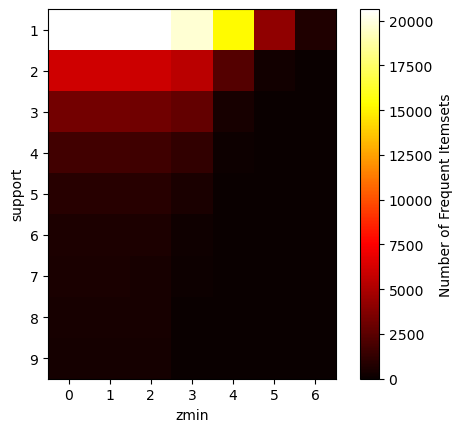

In [7]:
# Numero di Frequent itemsets con diversi valori di support e zmin

supports = np.arange(1, 10)
zmins = np.arange(0, 7)
len_frequent_itemsets = []

for supp in supports:
    for zmin in zmins:
        itemsets = apriori(X, target="s", supp=supp, zmin=zmin, report="S")
        len_frequent_itemsets.append(len(itemsets))

len_frequent_itemsets = np.array(len_frequent_itemsets).reshape(len(supports), len(zmins))

plt.imshow(len_frequent_itemsets, cmap='hot', interpolation='nearest')
plt.colorbar(label='Number of Frequent Itemsets')
plt.xticks(np.arange(len(zmins)), zmins)
plt.yticks(np.arange(len(supports)), supports)
plt.xlabel('zmin')
plt.ylabel('support')
plt.show()


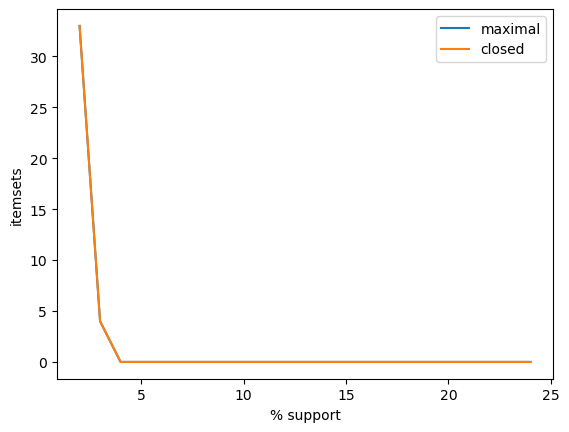

In [8]:
len_max_it = []
len_cl_it = []
max_supp = 25
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    cl_itemsets = apriori(X, target="c", supp=i, zmin=zmin)
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))

plt.plot(np.arange(2, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed")
plt.legend()
plt.xlabel("% support")
plt.ylabel("itemsets")

plt.show()

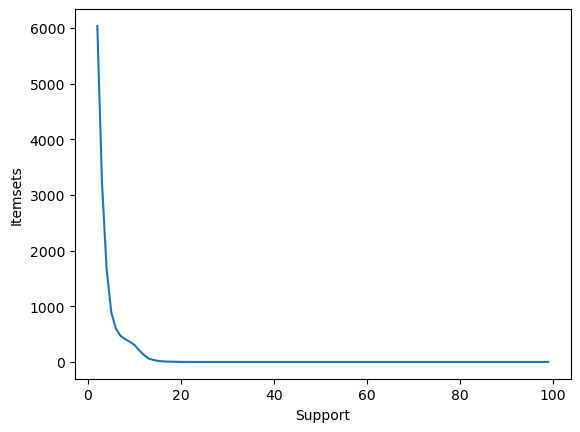

In [9]:
#Number of Frequent Itemsets with Different Support Values
#considerando zmin=2, come cambia il numero di frequent itemset al variare del support?

supports = np.arange(2, 100)
zmin = 2
len_itemsets = []

for supp in supports:
    itemsets = apriori(X, target="s", supp=supp, zmin=zmin, report="S")
    len_itemsets.append(len(itemsets))

plt.plot(supports, len_itemsets)
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.show()


In [10]:
#numeri di itemset frequenti con diversi valori di support

support_values = np.arange(2, max_supp)
num_itemsets = len_max_it

support_itemsets = list(zip(support_values, num_itemsets))
support_itemsets


[(2, 33),
 (3, 4),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 0),
 (10, 0),
 (11, 0),
 (12, 0),
 (13, 0),
 (14, 0),
 (15, 0),
 (16, 0),
 (17, 0),
 (18, 0),
 (19, 0),
 (20, 0),
 (21, 0),
 (22, 0),
 (23, 0),
 (24, 0)]

In [11]:
#most frequent itemset con zmin=2 e support=20

supp = 20
zmin = 2

itemsets = apriori(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["itemsets", "support"])

,itemsets,support
0,"((-0.001, 0.27]_val, (-0.001, 0.497]_danc)",20.772849


In [12]:
#most frequent itemset con zmin=2 e support=18

supp = 18
zmin = 2

itemsets = apriori(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["itemsets", "support"])

,itemsets,support
0,"((0.414, 0.996]_acoust, (-6.8020000000000005, ...",19.885753
1,"((0.374, 1.0]_instr, (-6.8020000000000005, -0....",18.635753
2,"((0.374, 1.0]_instr, (-0.001, 0.27]_val)",18.165323
3,"((-0.001, 0.27]_val, (-0.001, 0.497]_danc)",20.772849


In [13]:
supp=10
conf = 70
zmin=2
rules = apriori(X, target='r', supp=supp, conf=conf, zmin=zmin, report='aScl')
rules_df = pd.DataFrame(rules, 
                        columns=[
                            "consequent",
                            "antecedent",
                            "abs_support",
                            "%_support",
                            "confidence",
                            "lift",
                        ],
)
rules_df.sort_values(by="lift", axis=0, ascending=False)

,consequent,antecedent,abs_support,%_support,confidence,lift
4,"(-6.8020000000000005, -0.054]_loud","((0.414, 0.996]_acoust, (0.374, 1.0]_instr)",1585,10.651882,0.875691,2.627072
10,"(-6.8020000000000005, -0.054]_loud","((0.414, 0.996]_acoust, (-0.001, 0.27]_val)",1618,10.873656,0.819656,2.458967
19,"(-0.001, 0.27]_val","((0.374, 1.0]_instr, (-0.001, 0.497]_danc)",1746,11.733871,0.812849,2.436092
11,"(-6.8020000000000005, -0.054]_loud","((0.414, 0.996]_acoust, (-0.001, 0.497]_danc)",1615,10.853495,0.787805,2.363415
20,"(-0.001, 0.27]_val","((-6.8020000000000005, -0.054]_loud, (-0.001, ...",1737,11.673387,0.777181,2.329196
8,"(-0.001, 0.27]_val","((0.414, 0.996]_acoust, (-6.8020000000000005, ...",1250,8.400538,0.773994,2.319643
7,"(-0.001, 0.497]_danc","((0.414, 0.996]_acoust, (-6.8020000000000005, ...",1250,8.400538,0.772559,2.311153
5,"(0.414, 0.996]_acoust","((-6.8020000000000005, -0.054]_loud, (-2.30099...",1526,10.255376,0.722880,2.171267
1,"(-0.456, 0.364]_tempo","((0.657, 0.98]_danc, (0.206, 7.23]_Dur_ms)",1094,7.352151,0.723545,2.171073
12,"(0.414, 0.996]_acoust","((-6.8020000000000005, -0.054]_loud, (-0.001, ...",1615,10.853495,0.722595,2.170411


10 60
10 61
10 62
10 63
10 64
10 65
10 66
10 67
10 68
10 69
10 70
10 71
10 72
10 73
10 74
10 75
10 76
10 77
10 78
10 79
11 60
11 61
11 62
11 63
11 64
11 65
11 66
11 67
11 68
11 69
11 70
11 71
11 72
11 73
11 74
11 75
11 76
11 77
11 78
11 79
12 60
12 61
12 62
12 63
12 64
12 65
12 66
12 67
12 68
12 69
12 70
12 71
12 72
12 73
12 74
12 75
12 76
12 77
12 78
12 79
13 60
13 61
13 62
13 63
13 64
13 65
13 66
13 67
13 68
13 69
13 70
13 71
13 72
13 73
13 74
13 75
13 76
13 77
13 78
13 79
14 60
14 61
14 62
14 63
14 64
14 65
14 66
14 67
14 68
14 69
14 70
14 71
14 72
14 73
14 74
14 75
14 76
14 77
14 78
14 79
15 60
15 61
15 62
15 63
15 64
15 65
15 66
15 67
15 68
15 69
15 70
15 71
15 72
15 73
15 74
15 75
15 76
15 77
15 78
15 79
16 60
16 61
16 62
16 63
16 64
16 65
16 66
16 67
16 68
16 69
16 70
16 71
16 72
16 73
16 74
16 75
16 76
16 77
16 78
16 79
17 60
17 61
17 62
17 63
17 64
17 65
17 66
17 67
17 68
17 69
17 70
17 71
17 72
17 73
17 74
17 75
17 76
17 77
17 78
17 79
18 60
18 61
18 62
18 63
18 64
18 65
18 6

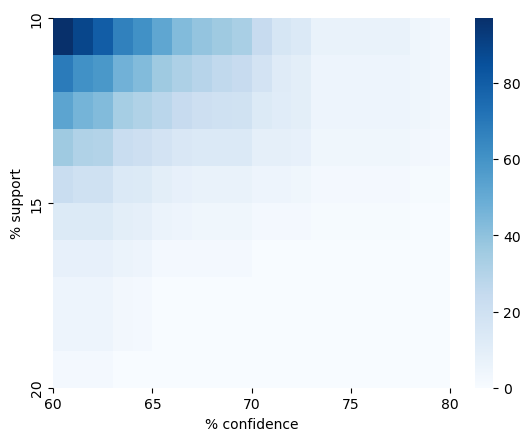

In [14]:
#apriori - number of rules for each combination of support and confidence

heatmap_plot = True  # Define the variable heatmap_plot
if heatmap_plot:
    len_r = []
    min_sup = 10
    max_sup = 20
    min_conf = 60
    max_conf = 80
    for i in range(min_sup, max_sup):  # support
        len_r_wrt_i = []
        for j in range(min_conf, max_conf):  # confidence
            rules = apriori(X, target="r", supp=i, zmin=zmin, conf=j, report="aScl")
            len_r_wrt_i.append(len(rules))  # study your characteristics/properties here
            print(i, j)

        len_r.append(len_r_wrt_i)
    len_r = np.array(len_r)

    sns.heatmap(len_r, cmap="Blues", fmt='g')
    plt.yticks(np.arange(0, max_sup - min_sup + 1, 5), np.arange(min_sup, max_sup + 1, 5))
    plt.xticks(np.arange(0, max_conf - min_conf + 1, 5), np.arange(min_conf, max_conf + 1, 5))
    plt.xlabel("% confidence")
    plt.ylabel("% support")
    plt.show()

10 60
10 61
10 62
10 63
10 64
10 65
10 66
10 67
10 68
10 69
10 70
10 71
10 72
10 73
10 74
10 75
10 76
10 77
10 78
10 79
11 60
11 61
11 62
11 63
11 64
11 65
11 66
11 67
11 68
11 69
11 70
11 71
11 72
11 73
11 74
11 75
11 76
11 77
11 78
11 79
12 60
12 61
12 62
12 63
12 64
12 65
12 66
12 67
12 68
12 69
12 70
12 71
12 72
12 73
12 74
12 75
12 76
12 77
12 78
12 79
13 60
13 61
13 62
13 63
13 64
13 65
13 66
13 67
13 68
13 69
13 70
13 71
13 72
13 73
13 74
13 75
13 76
13 77
13 78
13 79
14 60
14 61
14 62
14 63
14 64
14 65
14 66
14 67
14 68
14 69
14 70
14 71
14 72
14 73
14 74
14 75
14 76
14 77
14 78
14 79
15 60
15 61
15 62
15 63
15 64
15 65
15 66
15 67
15 68
15 69
15 70
15 71
15 72
15 73
15 74
15 75
15 76
15 77
15 78
15 79
16 60
16 61
16 62
16 63
16 64
16 65
16 66
16 67
16 68
16 69
16 70
16 71
16 72
16 73
16 74
16 75
16 76
16 77
16 78
16 79
17 60
17 61
17 62
17 63
17 64
17 65
17 66
17 67
17 68
17 69
17 70
17 71
17 72
17 73
17 74
17 75
17 76
17 77
17 78
17 79
18 60
18 61
18 62
18 63
18 64
18 65
18 6

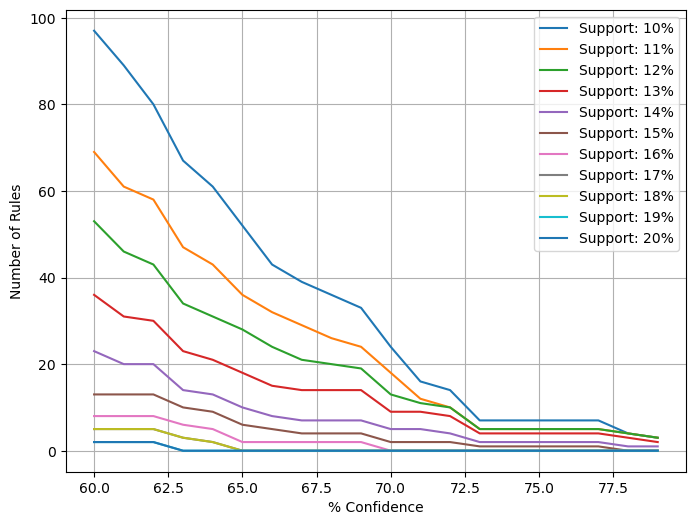

In [15]:
#different graph

len_r = []
min_sup = 10
max_sup = 21
min_conf = 60
max_conf = 80
for i in range(min_sup, max_sup):  # support
    len_r_wrt_i = []
    for j in range(min_conf, max_conf):  # confidence
        rules = apriori(X, target="r", supp=i, zmin=zmin, conf=j, report="aScl")
        len_r_wrt_i.append(len(rules))  # study your characteristics/properties here
        print(i, j)

    len_r.append(len_r_wrt_i)
len_r = np.array(len_r)

plt.figure(figsize=(8, 6))
for i in range(len(len_r)):
    plt.plot(range(min_conf, max_conf), len_r[i], label=f"Support: {min_sup+i}%")

plt.xlabel("% Confidence")
plt.ylabel("Number of Rules")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
#rules con support = 15 e confidence = 65

supp=15
conf = 65
zmin=2
rules = apriori(X, target='r', supp=supp, conf=conf, zmin=zmin, report='aScl')
rules_df = pd.DataFrame(rules, 
                        columns=[
                            "consequent",
                            "antecedent",
                            "abs_support",
                            "%_support",
                            "confidence",
                            "lift",
                        ],
)
rules_df.sort_values(by="lift", axis=0, ascending=False)

,consequent,antecedent,abs_support,%_support,confidence,lift
5,"(-0.001, 0.27]_val","((-6.8020000000000005, -0.054]_loud, (-0.001, ...",1737,11.673387,0.777181,2.329196
2,"(0.414, 0.996]_acoust","((-6.8020000000000005, -0.054]_loud, (-0.001, ...",1615,10.853495,0.722595,2.170411
3,"(0.374, 1.0]_instr","((-6.8020000000000005, -0.054]_loud, (-0.001, ...",1751,11.767473,0.699561,2.099105
4,"(-0.001, 0.497]_danc","((-6.8020000000000005, -0.054]_loud, (-0.001, ...",1737,11.673387,0.693967,2.076042
1,"(-6.8020000000000005, -0.054]_loud","((0.414, 0.996]_acoust, (-3.0669999999999997, ...",1515,10.181452,0.666813,2.000440
0,"(-6.8020000000000005, -0.054]_loud","((0.414, 0.996]_acoust, (-2.3009999999999997, ...",1526,10.255376,0.658895,1.976684


In [17]:
#frequent itemsets con support = 15

supp = 15
zmin = 2

itemsets = apriori(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["itemsets", "support"])

,itemsets,support
0,"((0.35, 0.94]_pop, (-0.001, 1.25e-05]_instr)",16.135753
1,"((0.657, 0.98]_danc, (0.579, 0.995]_val)",17.788978
2,"((0.657, 0.98]_danc, (-0.456, 0.364]_tempo)",16.176075
3,"((0.579, 0.995]_val, (-0.001, 1.25e-05]_instr)",15.067204
4,"((0.0698, 0.939]_speech, (0.516, 2.012]_loud)",15.154570
5,"((0.414, 0.996]_acoust, (-6.8020000000000005, ...",19.885753
6,"((0.414, 0.996]_acoust, (-2.3009999999999997, ...",15.564516
7,"((0.414, 0.996]_acoust, (-3.0669999999999997, ...",15.268817
8,"((0.414, 0.996]_acoust, (-0.001, 0.0411]_speech)",16.008065
9,"((0.374, 1.0]_instr, (-6.8020000000000005, -0....",18.635753


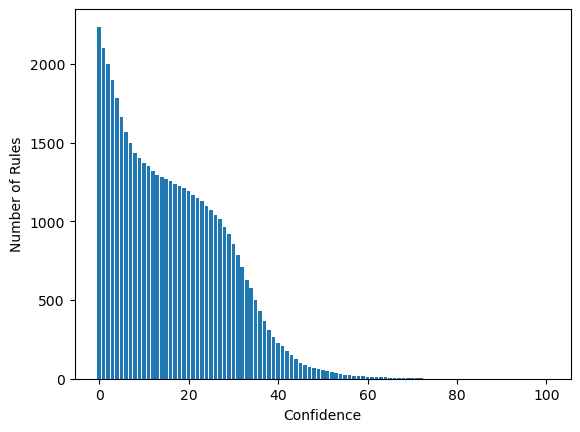

In [18]:
confidence_values = np.arange(0, 101)
num_rules = []

for conf in confidence_values:
    rules = apriori(X, target='r', supp=15, conf=conf, zmin=2, report='aScl')
    num_rules.append(len(rules))

plt.bar(confidence_values, num_rules)
plt.xlabel('Confidence')
plt.ylabel('Number of Rules')
plt.show()


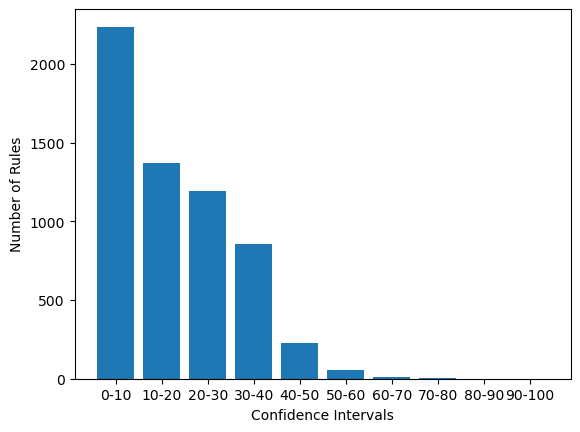

In [26]:
confidence_ranges = np.linspace(0, 100, 11)
num_rules = []

for i in range(len(confidence_ranges) - 1):
    min_conf = confidence_ranges[i]
    max_conf = confidence_ranges[i + 1]
    rules = apriori(X, target='r', supp=15, conf=min_conf, zmin=2, report='aScl')
    num_rules.append(len(rules))

# Create the intervals for the x-axis labels
intervals = [f"{int(min_conf)}-{int(max_conf)}" for min_conf, max_conf in zip(confidence_ranges[:-1], confidence_ranges[1:])]

plt.bar(range(len(num_rules)), num_rules)
plt.xlabel('Confidence Intervals')
plt.ylabel('Number of Rules')

# Set xticks and labels
plt.xticks(range(len(num_rules)), intervals)

plt.show()

In [27]:
#numero di rules estratte per ogni intervallo di confidence
num_rules

[2237, 1373, 1192, 856, 228, 55, 13, 2, 0, 0]

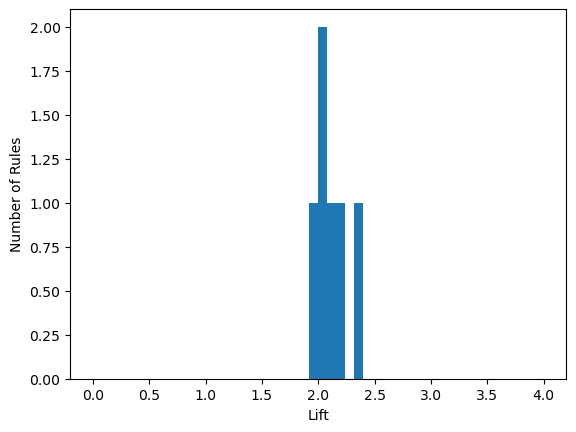

In [21]:
import matplotlib.pyplot as plt
from fim import apriori

zmin = 2
confidence = 65
support = 15

rules = apriori(X, target='r', supp=support, conf=confidence, zmin=zmin, report='aScl')

lift_values = [rule[5] for rule in rules]
plt.hist(lift_values, bins=50, range=(0, 4))
plt.xlabel('Lift')
plt.ylabel('Number of Rules')
plt.show()


In [73]:
#test dataset 5000 osservazioni

Xtest=pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\università\Magistrale\Primo Anno\Primo Semestre\Data Mining\TEST_DF_2.csv")
Xtest=Xtest.drop(columns=['Unnamed: 0'])
Xtest

,duration_ms,popularity,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,-0.361674,0.32,0.383,0.858150,0.1040,0.006070,0.000000,0.2610,0.668,-0.434941,11
1,0.839690,0.41,0.464,-0.043458,0.0596,0.281000,0.827000,0.0992,0.140,1.567868,4
2,-1.053968,0.40,0.611,0.680938,0.0326,0.094600,0.000005,0.1390,0.285,-1.108132,10
3,0.031401,0.25,0.500,1.200537,0.0350,0.008170,0.318000,0.7320,0.955,0.202724,14
4,-0.349025,0.00,0.802,0.006195,0.1230,0.001810,0.010200,0.2360,0.637,0.201512,4
...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.593398,0.17,0.217,-1.296146,0.0327,0.901000,0.914000,0.1350,0.201,0.594557,6
4996,0.172742,0.02,0.467,0.123723,0.0599,0.001810,0.000057,0.0971,0.203,0.693865,12
4997,0.138530,0.19,0.524,0.612226,0.0469,0.000057,0.005170,0.1070,0.840,0.529169,11
4998,1.570565,0.19,0.166,0.884565,0.1100,0.000032,0.005520,0.0656,0.233,-1.599896,1


In [74]:
#valence è la variabile target (rule con il più alto lift)
Ytest = Xtest['valence']

In [75]:
#tolgo valence dal dataset
Xtest = Xtest.drop(columns=['valence'])
Xtest

,duration_ms,popularity,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,genre
0,-0.361674,0.32,0.383,0.858150,0.1040,0.006070,0.000000,0.2610,-0.434941,11
1,0.839690,0.41,0.464,-0.043458,0.0596,0.281000,0.827000,0.0992,1.567868,4
2,-1.053968,0.40,0.611,0.680938,0.0326,0.094600,0.000005,0.1390,-1.108132,10
3,0.031401,0.25,0.500,1.200537,0.0350,0.008170,0.318000,0.7320,0.202724,14
4,-0.349025,0.00,0.802,0.006195,0.1230,0.001810,0.010200,0.2360,0.201512,4
...,...,...,...,...,...,...,...,...,...,...
4995,-1.593398,0.17,0.217,-1.296146,0.0327,0.901000,0.914000,0.1350,0.594557,6
4996,0.172742,0.02,0.467,0.123723,0.0599,0.001810,0.000057,0.0971,0.693865,12
4997,0.138530,0.19,0.524,0.612226,0.0469,0.000057,0.005170,0.1070,0.529169,11
4998,1.570565,0.19,0.166,0.884565,0.1100,0.000032,0.005520,0.0656,-1.599896,1


In [76]:
import numpy as np
Xtest['pred_valence'] = np.where(((-6.8012 < Xtest['loudness']) & (Xtest['loudness'] < -0.0540)) & ((0 < Xtest['danceability']) & (Xtest['danceability'] < 0.497)), 1, 0)
Xtest


,duration_ms,popularity,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,genre,pred_valence
0,-0.361674,0.32,0.383,0.858150,0.1040,0.006070,0.000000,0.2610,-0.434941,11,0
1,0.839690,0.41,0.464,-0.043458,0.0596,0.281000,0.827000,0.0992,1.567868,4,0
2,-1.053968,0.40,0.611,0.680938,0.0326,0.094600,0.000005,0.1390,-1.108132,10,0
3,0.031401,0.25,0.500,1.200537,0.0350,0.008170,0.318000,0.7320,0.202724,14,0
4,-0.349025,0.00,0.802,0.006195,0.1230,0.001810,0.010200,0.2360,0.201512,4,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.593398,0.17,0.217,-1.296146,0.0327,0.901000,0.914000,0.1350,0.594557,6,1
4996,0.172742,0.02,0.467,0.123723,0.0599,0.001810,0.000057,0.0971,0.693865,12,0
4997,0.138530,0.19,0.524,0.612226,0.0469,0.000057,0.005170,0.1070,0.529169,11,0
4998,1.570565,0.19,0.166,0.884565,0.1100,0.000032,0.005520,0.0656,-1.599896,1,0


In [78]:
Y_pred = Xtest['pred_valence']

In [81]:
Ytest_binary = np.where(Ytest > 0.27, 0, 1)
accuracy = accuracy_score(Ytest_binary, Y_pred)
accuracy


0.7396

In [88]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Ytest_binary, Y_pred)

array([[3125,  177],
       [1125,  573]], dtype=int64)